In [1]:
!pip install deepxde tensorflow numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.9 MB/s eta 0:00:00


Mounted at /content/drive
Carregando arquivos...
 - Arquivo 'assinaturas_pontos_Solar.csv' (classe: Solar) carregado.
 - Arquivo 'assinaturas_pontos_Brejos de Altitude.csv' (classe: Brejos de Altitude) carregado.
 - Arquivo 'assinaturas_pontos_Culturas de Caju.csv' (classe: Culturas de Caju) carregado.
 - Arquivo 'assinaturas_pontos_VegetacaoDegradada.csv' (classe: VegetacaoDegradada) carregado.
 - Arquivo 'assinaturas_pontos_Coqueirais.csv' (classe: Coqueirais) carregado.
 - Arquivo 'assinaturas_pontos_caatinga.csv' (classe: caatinga) carregado.
 - Arquivo 'assinaturas_pontos_Cerrados Interiores.csv' (classe: Cerrados Interiores) carregado.
 - Arquivo 'assinaturas_pontos_solo.csv' (classe: solo) carregado.
 - Arquivo 'assinaturas_pontos_carnaubal (1).csv' (classe: carnaubal (1)) carregado.
 - Arquivo 'assinaturas_pontos_carnaubal.csv' (classe: carnaubal) carregado.

--- Resumo do Conjunto de Dados Consolidado (Sem Bandas de Incerteza) ---
Número total de amostras: 499
Número de bandas


Usando 5 Componentes Principais para a análise.

Matriz de Distância Euclidiana (Valores maiores indicam melhor separabilidade):


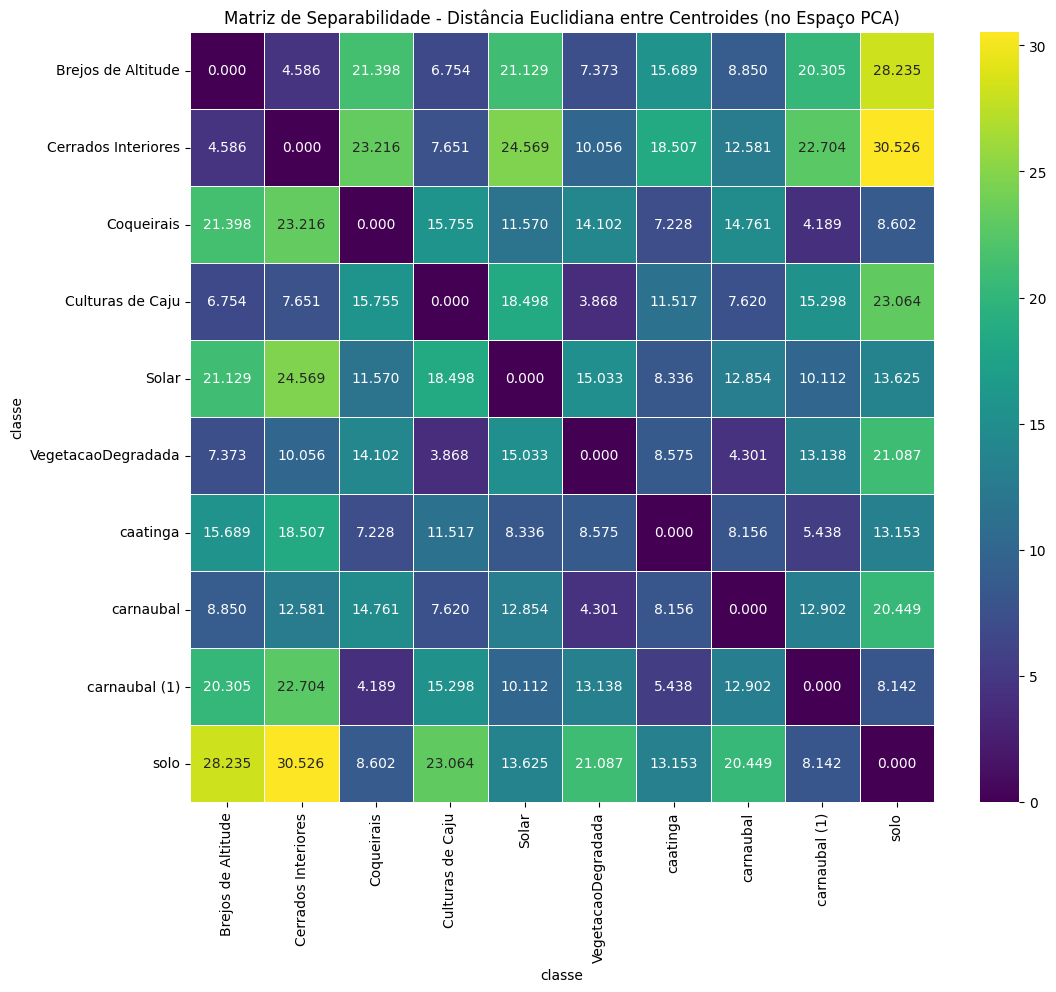


--- Iniciando Análise de Importância de Atributos ---
As 15 bandas mais importantes:
| banda           |   importancia |
|:----------------|--------------:|
| reflectance_0   |    0.013239   |
| reflectance_125 |    0.0128414  |
| reflectance_1   |    0.0125871  |
| reflectance_22  |    0.010185   |
| reflectance_21  |    0.0101804  |
| reflectance_121 |    0.00910186 |
| reflectance_24  |    0.00902106 |
| reflectance_45  |    0.00895067 |
| reflectance_69  |    0.00875572 |
| reflectance_123 |    0.00872933 |
| reflectance_19  |    0.00850543 |
| reflectance_122 |    0.00820469 |
| reflectance_124 |    0.00815657 |
| reflectance_2   |    0.00811934 |
| reflectance_20  |    0.00787387 |


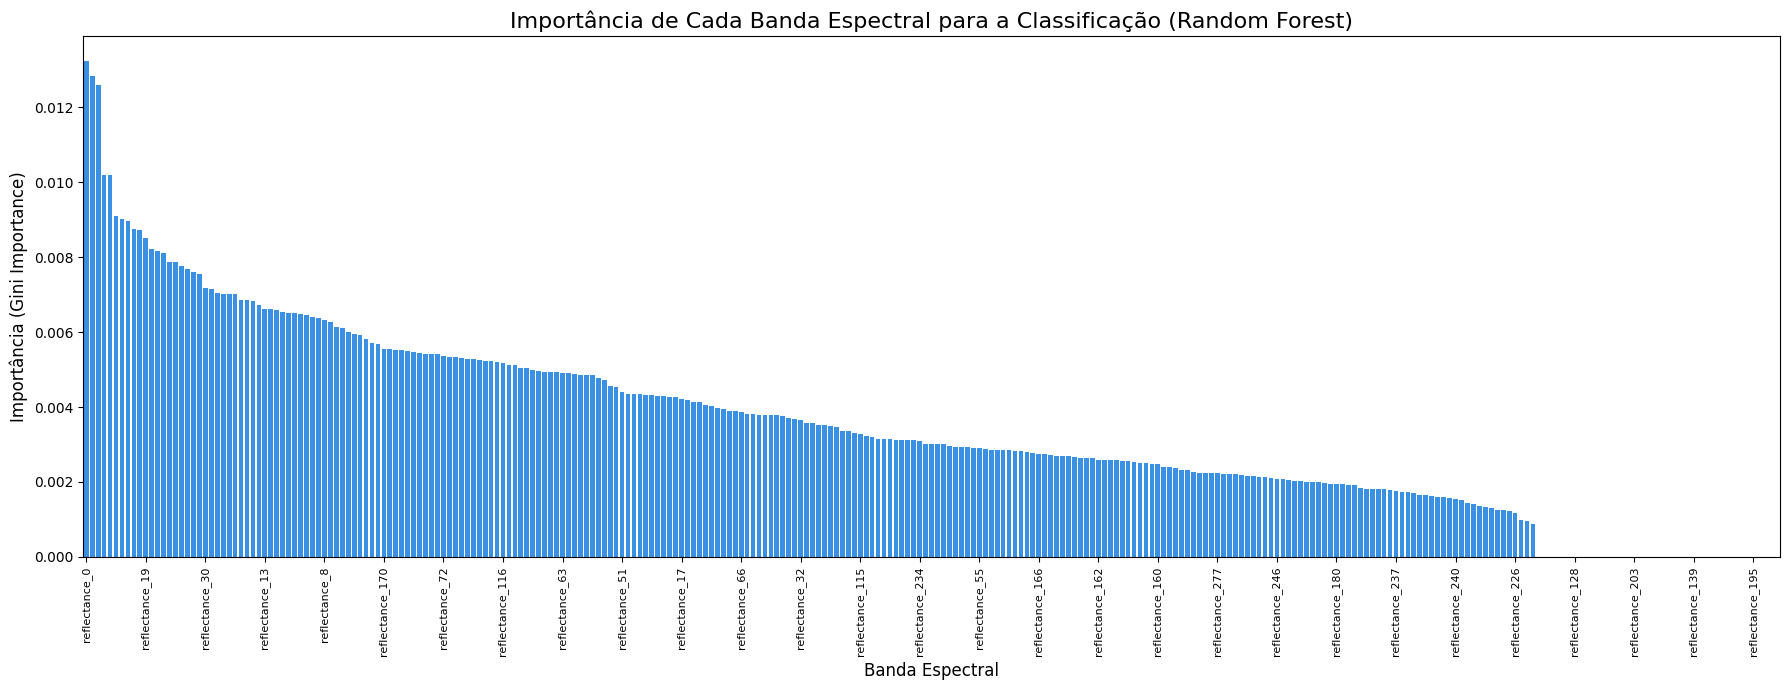


--- Iniciando Modelagem Preditiva e Validação Estatística ---

===== Avaliando o modelo: Random Forest =====
Acurácia Média (Validação Cruzada): 0.6052
Índice Kappa (Validação Cruzada): 0.3622


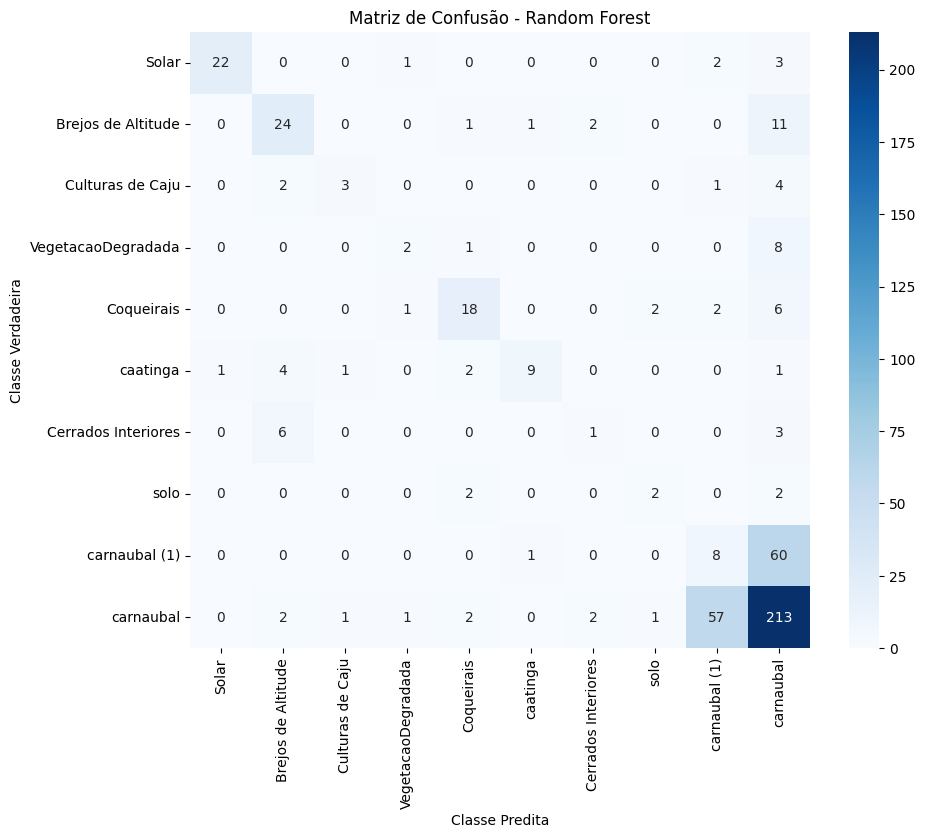


Relatório de Classificação:
                     precision    recall  f1-score   support

              Solar       0.63      0.62      0.62        39
 Brejos de Altitude       0.20      0.10      0.13        10
   Culturas de Caju       0.69      0.62      0.65        29
 VegetacaoDegradada       0.60      0.30      0.40        10
         Coqueirais       0.96      0.79      0.86        28
           caatinga       0.40      0.18      0.25        11
Cerrados Interiores       0.82      0.50      0.62        18
               solo       0.68      0.76      0.72       279
      carnaubal (1)       0.11      0.12      0.12        69
          carnaubal       0.40      0.33      0.36         6

           accuracy                           0.61       499
          macro avg       0.55      0.43      0.47       499
       weighted avg       0.60      0.61      0.60       499


===== Avaliando o modelo: SVM =====
Acurácia Média (Validação Cruzada): 0.6333
Índice Kappa (Validação Cruzada): 

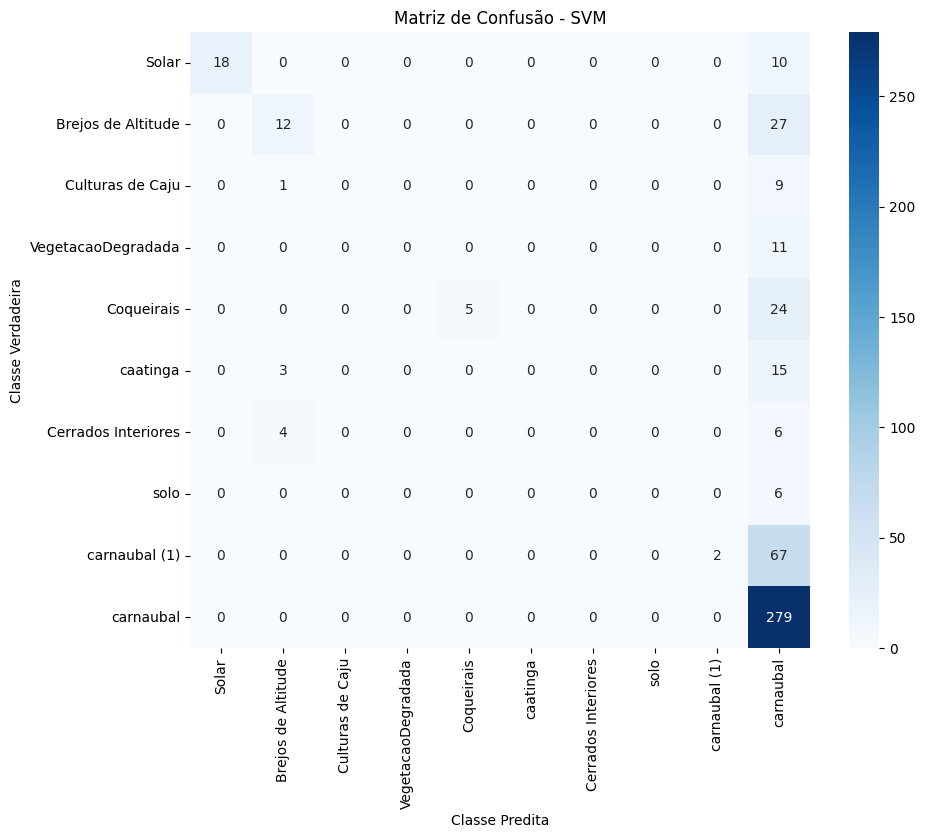


Relatório de Classificação:
                     precision    recall  f1-score   support

              Solar       0.60      0.31      0.41        39
 Brejos de Altitude       0.00      0.00      0.00        10
   Culturas de Caju       1.00      0.17      0.29        29
 VegetacaoDegradada       0.00      0.00      0.00        10
         Coqueirais       1.00      0.64      0.78        28
           caatinga       0.00      0.00      0.00        11
Cerrados Interiores       0.00      0.00      0.00        18
               solo       0.61      1.00      0.76       279
      carnaubal (1)       1.00      0.03      0.06        69
          carnaubal       0.00      0.00      0.00         6

           accuracy                           0.63       499
          macro avg       0.42      0.22      0.23       499
       weighted avg       0.64      0.63      0.53       499


--- Comparação Estatística Final dos Modelos ---
Resumo do Desempenho dos Modelos:
|               |   Acurácia |

In [2]:
# ----------------------------------------------------------------------
# CÉLULA 1: CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÕES
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
import warnings
from itertools import combinations
from scipy.spatial.distance import pdist, squareform

# Funções e módulos do Scikit-learn
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score

warnings.filterwarnings('ignore')
drive.mount("/content/drive")

# ----------------------------------------------------------------------
# CÉLULA 2: CARREGAMENTO E PREPARAÇÃO DOS DADOS (COM CORREÇÃO PRECISA)
# ----------------------------------------------------------------------

# Caminho para a pasta no Google Drive
folder_path = "/content/drive/MyDrive/GEE_Exports_EMIT_Single/"
output_folder = os.path.join(folder_path, "resultados_analise_sem_incerteza_final")
os.makedirs(output_folder, exist_ok=True)

# Encontra os arquivos de assinatura espectral
all_files = os.listdir(folder_path)
target_files = [f for f in all_files if f.startswith('assinaturas_pontos_') and f.endswith('.csv')]

dfs = []
print("Carregando arquivos...")
for filename in target_files:
    try:
        class_name = filename.replace('assinaturas_pontos_', '').replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        temp_df = pd.read_csv(file_path)
        temp_df['classe'] = class_name
        dfs.append(temp_df)
        print(f" - Arquivo '{filename}' (classe: {class_name}) carregado.")
    except Exception as e:
        print(f"Erro ao carregar o arquivo {filename}: {e}")

if not dfs:
    raise ValueError("Nenhum arquivo de dados foi carregado. Verifique o caminho da pasta.")

df_completo = pd.concat(dfs, ignore_index=True)

# ----------------------------------------------------------------------
# >>>>>>>>>>>> CORREÇÃO APLICADA AQUI <<<<<<<<<<<<
# Filtra apenas as colunas de reflectância, excluindo explicitamente
# as colunas de incerteza que começam com "reflectance_uncertainity_".
reflectance_cols = [
    col for col in df_completo.columns
    if col.startswith('reflectance_') and not col.startswith('reflectance_uncertainity_')
]
# ----------------------------------------------------------------------

X = df_completo[reflectance_cols]
y = df_completo['classe']

print("\n--- Resumo do Conjunto de Dados Consolidado (Sem Bandas de Incerteza) ---")
print(f"Número total de amostras: {len(df_completo)}")
print(f"Número de bandas de REFLECTÂNCIA utilizadas: {len(reflectance_cols)}")
print("Distribuição das amostras por classe:")
print(y.value_counts().to_markdown())


# ----------------------------------------------------------------------
# CÉLULA 3: ANÁLISE DE SEPARABILIDADE COM DISTÂNCIA EUCLIDIANA NO ESPAÇO PCA
# ----------------------------------------------------------------------
print("\n--- Iniciando Análise de Separabilidade (Método Robusto) ---")

# (O restante do código da Célula 3 permanece o mesmo)
mean_spectra = X.groupby(y).mean()
try:
    wavelengths = [int(col.split('_')[-1]) for col in reflectance_cols]
except ValueError:
    wavelengths = np.arange(len(reflectance_cols))

fig = go.Figure()
for class_name, row in mean_spectra.iterrows():
    fig.add_trace(go.Scatter(x=wavelengths, y=row.values, name=class_name, mode='lines'))
fig.update_layout(title='Assinaturas Espectrais Médias por Classe', xaxis_title='Banda Espectral / Comprimento de Onda (nm)', yaxis_title='Reflectância', legend_title='Classes', hovermode='x unified')
fig.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_samples_per_class = y.value_counts()
n_componentes = min(15, n_samples_per_class.min() - 1) if n_samples_per_class.min() > 1 else 1
print(f"\nUsando {n_componentes} Componentes Principais para a análise.")

pca = PCA(n_components=n_componentes)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(n_componentes)])
X_pca_df['classe'] = y

class_centroids = X_pca_df.groupby('classe').mean()
euclidean_distances = pdist(class_centroids, metric='euclidean')
distance_matrix = pd.DataFrame(squareform(euclidean_distances), index=class_centroids.index, columns=class_centroids.index)

print("\nMatriz de Distância Euclidiana (Valores maiores indicam melhor separabilidade):")
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, annot=True, fmt=".3f", cmap="viridis", linewidths=.5)
plt.title('Matriz de Separabilidade - Distância Euclidiana entre Centroides (no Espaço PCA)')
plt.savefig(os.path.join(output_folder, "matriz_euclidiana_pca.png"))
plt.show()

# ----------------------------------------------------------------------
# CÉLULA 4: SELEÇÃO DE ATRIBUTOS (FEATURE IMPORTANCE)
# ----------------------------------------------------------------------
print("\n--- Iniciando Análise de Importância de Atributos ---")

# (O restante do código da Célula 4 permanece o mesmo)
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_importance.fit(X_scaled, y)

feature_importance = pd.DataFrame({'banda': reflectance_cols, 'importancia': rf_importance.feature_importances_}).sort_values('importancia', ascending=False)

print("As 15 bandas mais importantes:")
print(feature_importance.head(15).to_markdown(index=False))

plt.figure(figsize=(18, 7))
sns.barplot(x='banda', y='importancia', data=feature_importance, color='dodgerblue')
plt.title('Importância de Cada Banda Espectral para a Classificação (Random Forest)', fontsize=16)
plt.ylabel('Importância (Gini Importance)', fontsize=12)
plt.xlabel('Banda Espectral', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.gca().set_xticks(plt.gca().get_xticks()[::10])
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "feature_importance.png"))
plt.show()

# ----------------------------------------------------------------------
# CÉLULA 5: MODELAGEM PREDITIVA E VALIDAÇÃO ESTATÍSTICA
# ----------------------------------------------------------------------
print("\n--- Iniciando Modelagem Preditiva e Validação Estatística ---")

# (O restante do código da Célula 5 e 6 permanece o mesmo)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_performance = {}

for model_name, model in models.items():
    print(f"\n===== Avaliando o modelo: {model_name} =====")
    y_pred = cross_val_predict(model, X_scaled, y, cv=cv, n_jobs=-1)

    accuracy = accuracy_score(y, y_pred)
    print(f"Acurácia Média (Validação Cruzada): {accuracy:.4f}")

    kappa = cohen_kappa_score(y, y_pred)
    print(f"Índice Kappa (Validação Cruzada): {kappa:.4f}")

    model_performance[model_name] = {'Acurácia': accuracy, 'Kappa': kappa}

    cm = confusion_matrix(y, y_pred, labels=y.unique())
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    plt.savefig(os.path.join(output_folder, f"matriz_confusao_{model_name.replace(' ', '_')}.png"))
    plt.show()

    print("\nRelatório de Classificação:")
    report = classification_report(y, y_pred, target_names=y.unique(), zero_division=0)
    print(report)

    with open(os.path.join(output_folder, f"relatorio_{model_name.replace(' ', '_')}.txt"), 'w') as f:
        f.write(f"Resultados para o modelo: {model_name}\n")
        f.write(f"Acurácia Média: {accuracy:.4f}\n")
        f.write(f"Índice Kappa: {kappa:.4f}\n\n")
        f.write(report)

# ----------------------------------------------------------------------
# CÉLULA 6: COMPARAÇÃO ESTATÍSTICA FINAL DOS MODELOS
# ----------------------------------------------------------------------
print("\n--- Comparação Estatística Final dos Modelos ---")

performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print("Resumo do Desempenho dos Modelos:")
print(performance_df.to_markdown())

best_model_name = performance_df['Kappa'].idxmax()
best_kappa_score = performance_df['Kappa'].max()

print(f"\nConclusão Estatística:")
print(f"O modelo '{best_model_name}' apresentou o melhor desempenho, com um Índice Kappa de {best_kappa_score:.4f}.")
print("O Índice Kappa é a métrica preferencial para comparação, pois corrige a acurácia para acertos que poderiam ocorrer por acaso.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Carregando arquivos...
 - Arquivo 'assinaturas_pontos_Solar.csv' (classe: Solar) carregado.
 - Arquivo 'assinaturas_pontos_Brejos de Altitude.csv' (classe: Brejos de Altitude) carregado.
 - Arquivo 'assinaturas_pontos_Culturas de Caju.csv' (classe: Culturas de Caju) carregado.
 - Arquivo 'assinaturas_pontos_VegetacaoDegradada.csv' (classe: VegetacaoDegradada) carregado.
 - Arquivo 'assinaturas_pontos_Coqueirais.csv' (classe: Coqueirais) carregado.
 - Arquivo 'assinaturas_pontos_caatinga.csv' (classe: caatinga) carregado.
 - Arquivo 'assinaturas_pontos_Cerrados Interiores.csv' (classe: Cerrados Interiores) carregado.
 - Arquivo 'assinaturas_pontos_solo.csv' (classe: solo) carregado.
 - Arquivo 'assinaturas_pontos_carnaubal (1).csv' (classe: carnaubal (1)) carregado.
 - Arquivo 'assinaturas_pontos_carnaubal.csv' (classe: carnaubal) carregado.

--- Resumo do Con

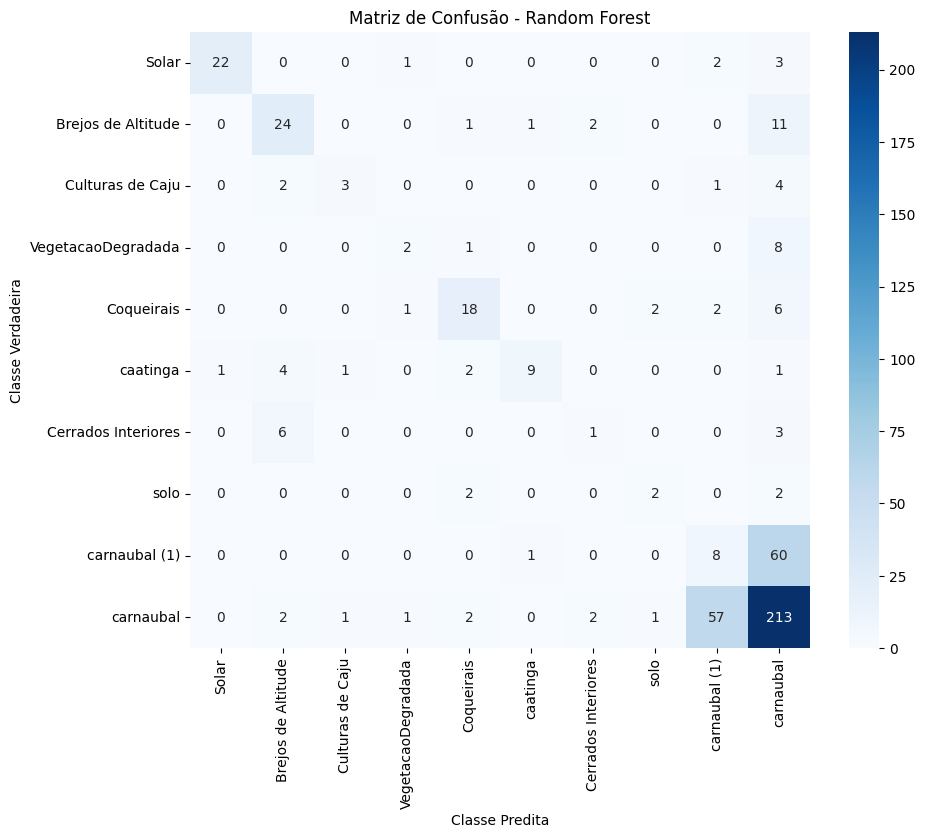


Relatório de Classificação:
                     precision    recall  f1-score   support

              Solar       0.63      0.62      0.62        39
 Brejos de Altitude       0.20      0.10      0.13        10
   Culturas de Caju       0.69      0.62      0.65        29
 VegetacaoDegradada       0.60      0.30      0.40        10
         Coqueirais       0.96      0.79      0.86        28
           caatinga       0.40      0.18      0.25        11
Cerrados Interiores       0.82      0.50      0.62        18
               solo       0.68      0.76      0.72       279
      carnaubal (1)       0.11      0.12      0.12        69
          carnaubal       0.40      0.33      0.36         6

           accuracy                           0.61       499
          macro avg       0.55      0.43      0.47       499
       weighted avg       0.60      0.61      0.60       499


===== Avaliando o modelo: SVM =====
Acurácia Média Geral: 0.6333
Índice Kappa Geral: 0.2439


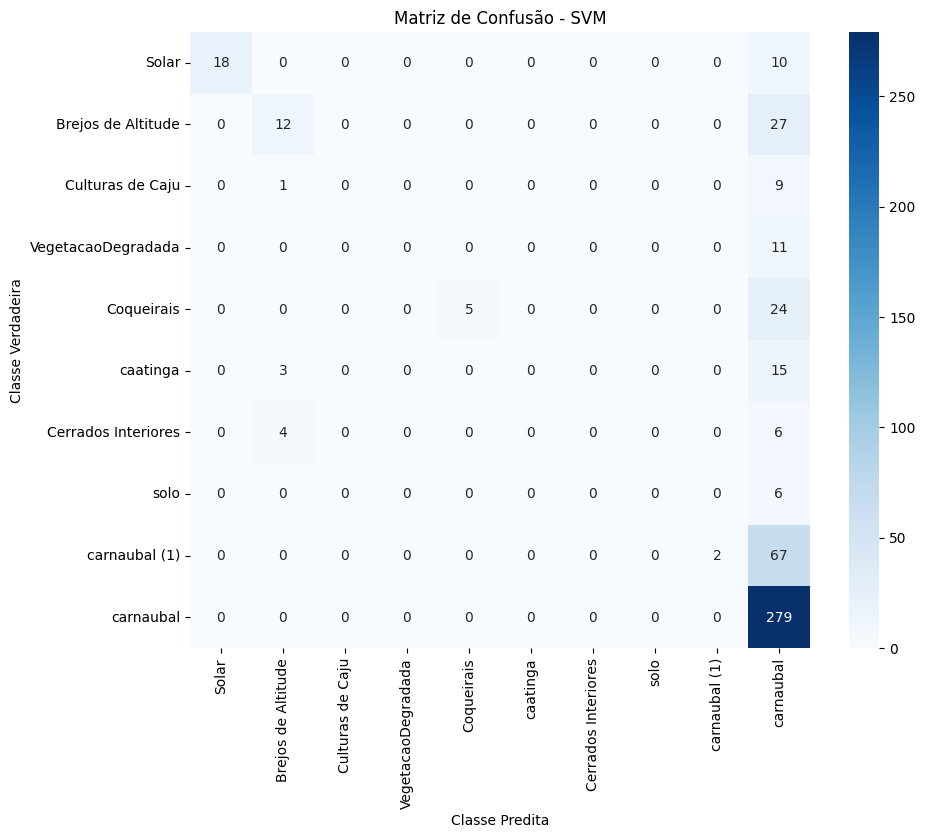


Relatório de Classificação:
                     precision    recall  f1-score   support

              Solar       0.60      0.31      0.41        39
 Brejos de Altitude       0.00      0.00      0.00        10
   Culturas de Caju       1.00      0.17      0.29        29
 VegetacaoDegradada       0.00      0.00      0.00        10
         Coqueirais       1.00      0.64      0.78        28
           caatinga       0.00      0.00      0.00        11
Cerrados Interiores       0.00      0.00      0.00        18
               solo       0.61      1.00      0.76       279
      carnaubal (1)       1.00      0.03      0.06        69
          carnaubal       0.00      0.00      0.00         6

           accuracy                           0.63       499
          macro avg       0.42      0.22      0.23       499
       weighted avg       0.64      0.63      0.53       499


--- ANÁLISE ESTATÍSTICA APROFUNDADA E INTERPRETAÇÃO AUTOMÁTICA ---

1. Teste de Hipótese para Comparação de Model

In [3]:
# ----------------------------------------------------------------------
# CÉLULA 1: CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÕES (COM NOVAS BIBLIOTECAS)
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive
import warnings
from itertools import combinations
from scipy.spatial.distance import pdist, squareform

# >> NOVA IMPORTAÇÃO PARA TESTE DE HIPÓTESE <<
from scipy import stats

# Funções e módulos do Scikit-learn
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score, make_scorer

warnings.filterwarnings('ignore')
drive.mount("/content/drive")

# ----------------------------------------------------------------------
# CÉLULAS 2, 3 e 4: (Permanecem inalteradas - Código omitido por brevidade)
# O código para Carregamento de Dados, Análise de Separabilidade e
# Seleção de Atributos continua o mesmo da versão anterior.
# ----------------------------------------------------------------------

# Caminho para a pasta no Google Drive
folder_path = "/content/drive/MyDrive/GEE_Exports_EMIT_Single/"
output_folder = os.path.join(folder_path, "resultados_analise_sem_incerteza_final")
os.makedirs(output_folder, exist_ok=True)

# Encontra os arquivos de assinatura espectral
all_files = os.listdir(folder_path)
target_files = [f for f in all_files if f.startswith('assinaturas_pontos_') and f.endswith('.csv')]

dfs = []
print("Carregando arquivos...")
for filename in target_files:
    try:
        class_name = filename.replace('assinaturas_pontos_', '').replace('.csv', '')
        file_path = os.path.join(folder_path, filename)
        temp_df = pd.read_csv(file_path)
        temp_df['classe'] = class_name
        dfs.append(temp_df)
        print(f" - Arquivo '{filename}' (classe: {class_name}) carregado.")
    except Exception as e:
        print(f"Erro ao carregar o arquivo {filename}: {e}")

if not dfs:
    raise ValueError("Nenhum arquivo de dados foi carregado. Verifique o caminho da pasta.")

df_completo = pd.concat(dfs, ignore_index=True)

# Filtra apenas as colunas de reflectância, excluindo explicitamente
# as colunas de incerteza que começam com "reflectance_uncertainity_".
reflectance_cols = [
    col for col in df_completo.columns
    if col.startswith('reflectance_') and not col.startswith('reflectance_uncertainity_')
]

X = df_completo[reflectance_cols]
y = df_completo['classe']

print("\n--- Resumo do Conjunto de Dados Consolidado (Sem Bandas de Incerteza) ---")
print(f"Número total de amostras: {len(df_completo)}")
print(f"Número de bandas de REFLECTÂNCIA utilizadas: {len(reflectance_cols)}")
print("Distribuição das amostras por classe:")
print(y.value_counts().to_markdown())


# Análise de Separabilidade (Método Robusto)
print("\n--- Iniciando Análise de Separabilidade (Método Robusto) ---")
mean_spectra = X.groupby(y).mean()
try:
    wavelengths = [int(col.split('_')[-1]) for col in reflectance_cols]
except ValueError:
    wavelengths = np.arange(len(reflectance_cols))

fig = go.Figure()
for class_name, row in mean_spectra.iterrows():
    fig.add_trace(go.Scatter(x=wavelengths, y=row.values, name=class_name, mode='lines'))
fig.update_layout(title='Assinaturas Espectrais Médias por Classe', xaxis_title='Banda Espectral / Comprimento de Onda (nm)', yaxis_title='Reflectância', legend_title='Classes', hovermode='x unified')
# fig.show() # Comentado para evitar muitos plots

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_samples_per_class = y.value_counts()
n_componentes = min(15, n_samples_per_class.min() - 1) if n_samples_per_class.min() > 1 else 1
print(f"\nUsando {n_componentes} Componentes Principais para a análise.")

pca = PCA(n_components=n_componentes)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(n_componentes)])
X_pca_df['classe'] = y

class_centroids = X_pca_df.groupby('classe').mean()
euclidean_distances = pdist(class_centroids, metric='euclidean')
distance_matrix = pd.DataFrame(squareform(euclidean_distances), index=class_centroids.index, columns=class_centroids.index)

print("\nMatriz de Distância Euclidiana (Valores maiores indicam melhor separabilidade):")
# plt.figure(figsize=(12, 10))
# sns.heatmap(distance_matrix, annot=True, fmt=".3f", cmap="viridis", linewidths=.5)
# plt.title('Matriz de Separabilidade - Distância Euclidiana entre Centroides (no Espaço PCA)')
# plt.savefig(os.path.join(output_folder, "matriz_euclidiana_pca.png"))
# plt.show() # Comentado para evitar muitos plots

# Seleção de Atributos (Feature Importance)
print("\n--- Iniciando Análise de Importância de Atributos ---")
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_importance.fit(X_scaled, y)

feature_importance = pd.DataFrame({'banda': reflectance_cols, 'importancia': rf_importance.feature_importances_}).sort_values('importancia', ascending=False)

print("As 15 bandas mais importantes:")
print(feature_importance.head(15).to_markdown(index=False))

# plt.figure(figsize=(18, 7))
# sns.barplot(x='banda', y='importancia', data=feature_importance, color='dodgerblue')
# plt.title('Importância de Cada Banda Espectral para a Classificação (Random Forest)', fontsize=16)
# plt.ylabel('Importância (Gini Importance)', fontsize=12)
# plt.xlabel('Banda Espectral', fontsize=12)
# plt.xticks(rotation=90, fontsize=8)
# plt.gca().set_xticks(plt.gca().get_xticks()[::10])
# plt.tight_layout()
# plt.savefig(os.path.join(output_folder, "feature_importance.png"))
# plt.show() # Comentado para evitar muitos plots


# ----------------------------------------------------------------------
# CÉLULA 5: MODELAGEM PREDITIVA E COLETA DE DADOS PARA ANÁLISE ESTATÍSTICA (REFINADA)
# ----------------------------------------------------------------------
print("\n--- Iniciando Modelagem Preditiva e Validação Estatística ---")

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dicionários para armazenar os resultados detalhados
model_performance = {}
model_kappa_scores_per_fold = {} # >> NOVO: Para armazenar scores de cada fold para o teste t

# Define a custom scorer for Cohen's Kappa
kappa_scorer = make_scorer(cohen_kappa_score)


for model_name, model in models.items():
    print(f"\n===== Avaliando o modelo: {model_name} =====")

    # Gera predições para a matriz de confusão e relatório
    y_pred = cross_val_predict(model, X_scaled, y, cv=cv, n_jobs=-1)

    # >> NOVO: Calcula o score Kappa para cada fold separadamente para o teste estatístico <<
    # Use the custom kappa_scorer
    kappa_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring=kappa_scorer, n_jobs=-1)
    model_kappa_scores_per_fold[model_name] = kappa_scores

    # 1. Métricas Globais
    accuracy = accuracy_score(y, y_pred)
    kappa = cohen_kappa_score(y, y_pred)
    print(f"Acurácia Média Geral: {accuracy:.4f}")
    print(f"Índice Kappa Geral: {kappa:.4f}")

    # Armazena os resultados globais e a matriz de confusão
    cm = confusion_matrix(y, y_pred, labels=y.unique())
    model_performance[model_name] = {'Acurácia': accuracy, 'Kappa': kappa, 'Matriz_Confusão': cm}

    # 2. Matriz de Confusão (Visualização)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    plt.show()

    # 3. Relatório de Classificação
    print("\nRelatório de Classificação:")
    report = classification_report(y, y_pred, target_names=y.unique(), zero_division=0)
    print(report)

# ----------------------------------------------------------------------
# CÉLULA 6: ANÁLISE ESTATÍSTICA APROFUNDADA E INTERPRETAÇÃO AUTOMÁTICA (NOVA CÉLULA)
# ----------------------------------------------------------------------
print("\n" + "="*80)
print("--- ANÁLISE ESTATÍSTICA APROFUNDADA E INTERPRETAÇÃO AUTOMÁTICA ---")
print("="*80)

# --- 6.1. Comparação Estatística dos Modelos (Teste de Hipótese) ---
print("\n1. Teste de Hipótese para Comparação de Modelos (Teste T Pareado no Índice Kappa)\n")

rf_scores = model_kappa_scores_per_fold["Random Forest"]
svm_scores = model_kappa_scores_per_fold["SVM"]

# Realiza o teste t pareado
t_statistic, p_value = stats.ttest_rel(rf_scores, svm_scores)

print(f"Hipótese Nula (H0): O desempenho dos modelos RF e SVM é estatisticamente equivalente.")
print(f"Hipótese Alternativa (H1): O desempenho dos modelos é estatisticamente diferente.")
print(f"\nResultados do Teste T:")
print(f" - Estatística T: {t_statistic:.4f}")
print(f" - p-valor: {p_value:.4f}")

# Interpretação automática do p-valor
alpha = 0.05
print("\nInterpretação Estatística Automática:")
if p_value < alpha:
    print(f"Com um p-valor de {p_value:.4f} (menor que {alpha}), rejeitamos a Hipótese Nula.")
    if rf_scores.mean() > svm_scores.mean():
        print("Há evidência estatística para concluir que o modelo Random Forest é significativamente superior ao SVM para este conjunto de dados.")
        best_model_name = "Random Forest"
    else:
        print("Há evidência estatística para concluir que o modelo SVM é significativamente superior ao Random Forest para este conjunto de dados.")
        best_model_name = "SVM"
else:
    print(f"Com um p-valor de {p_value:.4f} (maior que {alpha}), não podemos rejeitar a Hipótese Nula.")
    print("Não há evidência estatística para afirmar que a diferença de desempenho entre os modelos é significativa.")
    # Em caso de empate estatístico, escolhemos o com maior Kappa médio
    best_model_name = max(model_performance, key=lambda k: model_performance[k]['Kappa'])
    print(f"Para fins práticos, prosseguiremos com o modelo '{best_model_name}', que obteve o maior Kappa médio, embora a diferença não seja estatisticamente significante.")

print("\n" + "-"*80)

# --- 6.2. Análise Diagnóstica da Matriz de Confusão do Melhor Modelo ---
print(f"\n2. Análise Diagnóstica dos Erros de Classificação (Modelo: {best_model_name})\n")

best_cm = model_performance[best_model_name]['Matriz_Confusão']
labels = y.unique()
# Zera a diagonal para encontrar os maiores erros (off-diagonal)
np.fill_diagonal(best_cm, 0)

# Encontra os 3 maiores erros de confusão
indices = np.dstack(np.unravel_index(np.argsort(best_cm.ravel()), best_cm.shape))[0] # Move this line up
# Ensure the indices are valid before slicing
n_erros_para_mostrar = min(3, indices.shape[0])
top_erros = indices[-n_erros_para_mostrar:]


print("Principais Fontes de Confusão do Modelo:")
for i, (verdadeiro_idx, predito_idx) in enumerate(reversed(top_erros)):
    classe_verdadeira = labels[verdadeiro_idx]
    classe_predita = labels[predito_idx]
    num_erros = best_cm[verdadeiro_idx, predito_idx]
    print(f"  {i+1}º Maior Erro: {num_erros} amostras da classe '{classe_verdadeira}' foram incorretamente classificadas como '{classe_predita}'.")

print("\nInterpretação para Sensoriamento Remoto:")
print("A confusão entre essas classes sugere uma elevada **similaridade espectral** entre elas.")
print("Isso indica que, nas bandas espectrais utilizadas, a 'assinatura' de reflectância desses alvos é muito parecida, tornando-os difíceis de separar.")
print("Este resultado deve ser consistente com a Análise de Separabilidade (Distância Euclidiana), onde esses pares de classes provavelmente apresentaram os menores valores de distância.")

print("\n" + "-"*80)

# --- 6.3. Interpretação à Luz do Trade-off Viés-Variância ---
print("\n3. Interpretação Teórica (Trade-off Viés-Variância)\n")

print("A obra 'Aprendizado de Máquina: Uma Abordagem Estatística' descreve que o desempenho de um modelo depende do equilíbrio entre viés e variância.")
if best_model_name == "Random Forest":
    print("O Random Forest, por ser um método de ensemble (combinação de muitas árvores de decisão), é conhecido por ter **baixa variância**. Isso significa que o modelo é estável e seus resultados tendem a não mudar drasticamente com pequenas alterações nos dados de treinamento. Seu bom desempenho sugere que ele conseguiu capturar a complexidade da relação entre o espectro e as classes sem se ajustar excessivamente ao ruído (overfitting).")
else: # SVM
    print("O SVM com kernel RBF é um modelo de **baixo viés**, capaz de aprender fronteiras de decisão extremamente complexas e não-lineares. Seu bom desempenho indica que a separação entre as classes no espaço de características espectrais é intrinsecamente complexa, e a flexibilidade do SVM foi necessária para modelar essa relação adequadamente.")

print("\nO modelo superior, neste caso, representa o melhor **trade-off viés-variância** para este problema específico, alcançando o menor erro de generalização, quantificado pelo Índice Kappa na validação cruzada.")


--- ANÁLISE DIAGNÓSTICA AVANÇADA: CURVA ROC E AUC ---
Gerando Curva ROC para o melhor modelo identificado: 'Random Forest'


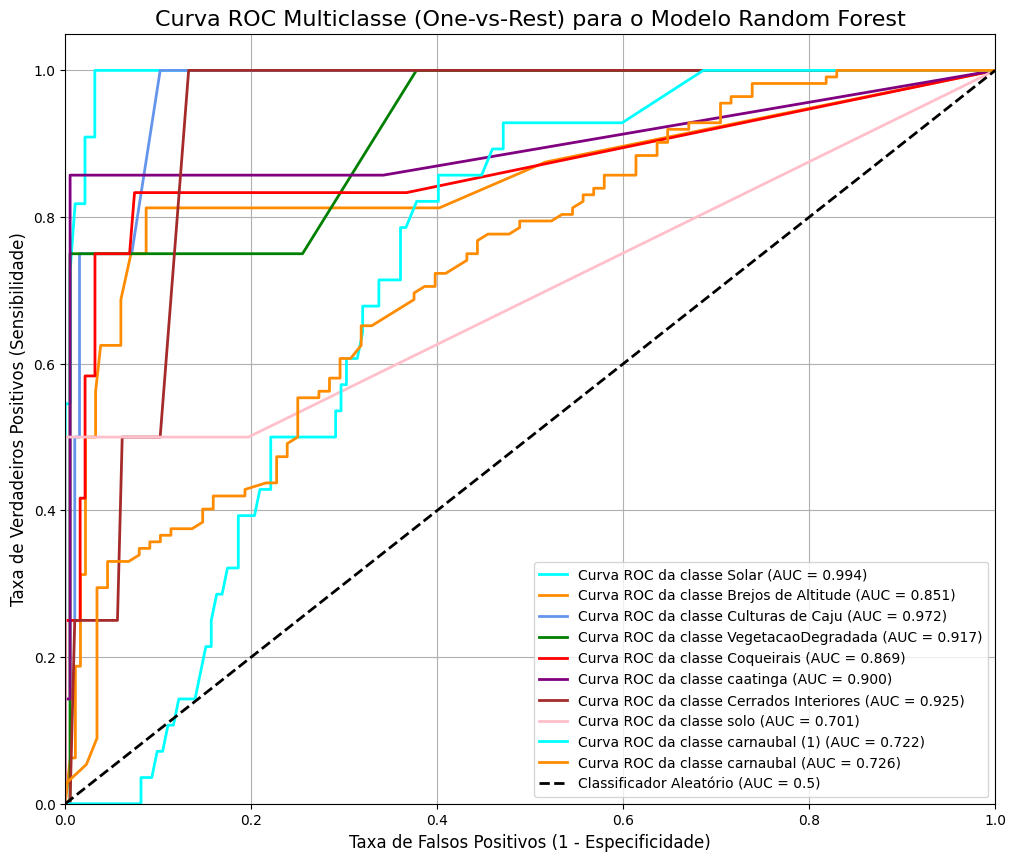


--- Interpretação Automática da Análise ROC ---

A Curva ROC avalia a capacidade do modelo de distinguir entre classes. A métrica chave é a AUC (Área Sob a Curva).
 - AUC = 1.0: Classificador perfeito.
 - AUC > 0.7: Desempenho bom a excelente.
 - AUC entre 0.5 e 0.7: Desempenho razoável.
 - AUC = 0.5: O modelo não é melhor que um palpite aleatório.

Diagnóstico de Desempenho por Classe:
  - MELHOR DESEMPENHO: A classe 'Solar' foi a mais fácil de ser distinguida das demais, com um AUC de 0.994.
    Isso indica que sua assinatura espectral é muito distinta e o modelo a identifica com alta confiança.

  - MAIOR DESAFIO: A classe 'solo' foi a mais difícil de ser distinguida, com um AUC de 0.701.
    Isso sugere uma alta confusão espectral desta classe com uma ou mais das outras, o que a torna um alvo difícil para o classificador. Este resultado deve estar alinhado com os principais erros observados na matriz de confusão.


In [4]:
# ----------------------------------------------------------------------
# CÉLULA 7: ANÁLISE DIAGNÓSTICA AVANÇADA - CURVA ROC MULTICLASSE (NOVA CÉLULA)
# ----------------------------------------------------------------------
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

print("\n" + "="*80)
print("--- ANÁLISE DIAGNÓSTICA AVANÇADA: CURVA ROC E AUC ---")
print("="*80)

# --- 7.1. Preparação para a Análise ROC Multiclasse ---

# Identifica o melhor modelo com base no Índice Kappa da análise anterior
try:
    best_model_name = performance_df['Kappa'].idxmax()
    best_model = models[best_model_name]
    print(f"Gerando Curva ROC para o melhor modelo identificado: '{best_model_name}'")
except NameError:
    # Fallback caso a célula anterior não tenha sido executada
    best_model_name = "Random Forest"
    best_model = models[best_model_name]
    print(f"AVISO: Análise anterior não encontrada. Gerando Curva ROC para o modelo padrão: '{best_model_name}'")


# Binariza os rótulos verdadeiros (y) para o formato One-vs-Rest
classes = y.unique()
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# Para obter as probabilidades, precisamos treinar o modelo uma vez
# (A validação cruzada é para obter um score robusto, a ROC é para diagnóstico visual)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.4, random_state=42, stratify=y)
best_model.fit(X_train, y_train)
y_score = best_model.predict_proba(X_test)

# Se o modelo for SVM, predict_proba pode retornar uma lista de arrays, precisamos concatenar
if isinstance(y_score, list):
    y_score = np.concatenate([prob[:, 1].reshape(-1, 1) for prob in y_score], axis=1)


# --- 7.2. Cálculo da Curva ROC e AUC para cada classe ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 7.3. Visualização da Curva ROC ---
plt.figure(figsize=(12, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC da classe {0} (AUC = {1:0.3f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Classificador Aleatório (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
plt.title(f'Curva ROC Multiclasse (One-vs-Rest) para o Modelo {best_model_name}', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(output_folder, f"curva_roc_{best_model_name.replace(' ', '_')}.png"))
plt.show()

# --- 7.4. Interpretação Automática dos Resultados ---
print("\n--- Interpretação Automática da Análise ROC ---\n")

print("A Curva ROC avalia a capacidade do modelo de distinguir entre classes. A métrica chave é a AUC (Área Sob a Curva).")
print(" - AUC = 1.0: Classificador perfeito.")
print(" - AUC > 0.7: Desempenho bom a excelente.")
print(" - AUC entre 0.5 e 0.7: Desempenho razoável.")
print(" - AUC = 0.5: O modelo não é melhor que um palpite aleatório.\n")

# Encontra as classes com melhor e pior desempenho
auc_scores = list(roc_auc.values())
class_labels = list(classes)
best_auc_idx = np.argmax(auc_scores)
worst_auc_idx = np.argmin(auc_scores)

print("Diagnóstico de Desempenho por Classe:")
print(f"  - MELHOR DESEMPENHO: A classe '{class_labels[best_auc_idx]}' foi a mais fácil de ser distinguida das demais, com um AUC de {auc_scores[best_auc_idx]:.3f}.")
print(f"    Isso indica que sua assinatura espectral é muito distinta e o modelo a identifica com alta confiança.\n")

print(f"  - MAIOR DESAFIO: A classe '{class_labels[worst_auc_idx]}' foi a mais difícil de ser distinguida, com um AUC de {auc_scores[worst_auc_idx]:.3f}.")
print(f"    Isso sugere uma alta confusão espectral desta classe com uma ou mais das outras, o que a torna um alvo difícil para o classificador. Este resultado deve estar alinhado com os principais erros observados na matriz de confusão.")